In [2]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santoshsaranyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv("data/Processed_Lyric_Dataset.csv")
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ..."
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo..."
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'..."
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',..."
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac..."


In [ ]:
# Converting the String column into lists
df['LyricsList'] = df.apply(lambda x: eval(x['LyricProcessed']), axis=1)
# Converting the list of words into a single string with all words
df['LyricsProcessed'] = df['LyricsList'].apply(lambda x: (' '.join(list(map(' '.join, x)))))

In [6]:
processed_lyrics = df['LyricsList'].explode().to_list()
processed_lyrics[:5]

[['feel', 'unsure'],
 ['take', 'hand', 'lead', 'dance', 'floor'],
 ['music', 'dy', 'something', 'eye'],
 ['call', 'mind', 'silver', 'screen'],
 ['sad', 'goodbye']]

In [29]:
# Training the w2v model
w2v_model = Word2Vec(sentences = processed_lyrics, vector_size=200, sg = 1, window = 3, min_count = 2, epochs = 100)

In [30]:
len(w2v_model.wv) # Size of vocabulary

102912

In [51]:
# Visualize for W2V MODEL

# Selecting a subset of the word embeddings
keys = ['crazy', 'face', 'caught', 'fool', 'gold', 'love', 'rock', 'hell']

# Getting the 25 most similar words for each word in the list
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [52]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
# Reducing to 2 dimensions using tsne
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


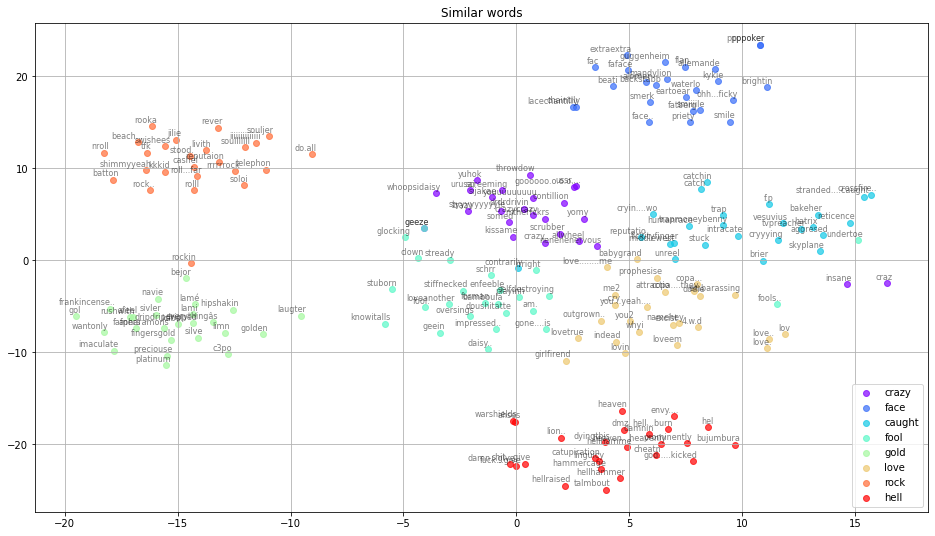

In [53]:
# Plotting the cluster of similar words
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [31]:
# Saving the word2vec model
w2v_model.wv.save_word2vec_format('data/w2v_embeddings.txt', binary = False)

In [6]:
from gensim import models
# Loading the pretrained glove model
glove_model = models.KeyedVectors.load_word2vec_format("data/glove.6B.200d.txt", binary=False, no_header=True)

In [31]:
# Visualize for Glove MODEL

# Selecting a subset of the word embeddings
keys = ['crazy', 'face', 'caught', 'fool', 'gold', 'love', 'rock', 'hell']
# Getting the 25 most similar words for each word in the list
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in glove_model.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(glove_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [32]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
# Reducing to 2 dimensions using tsne
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


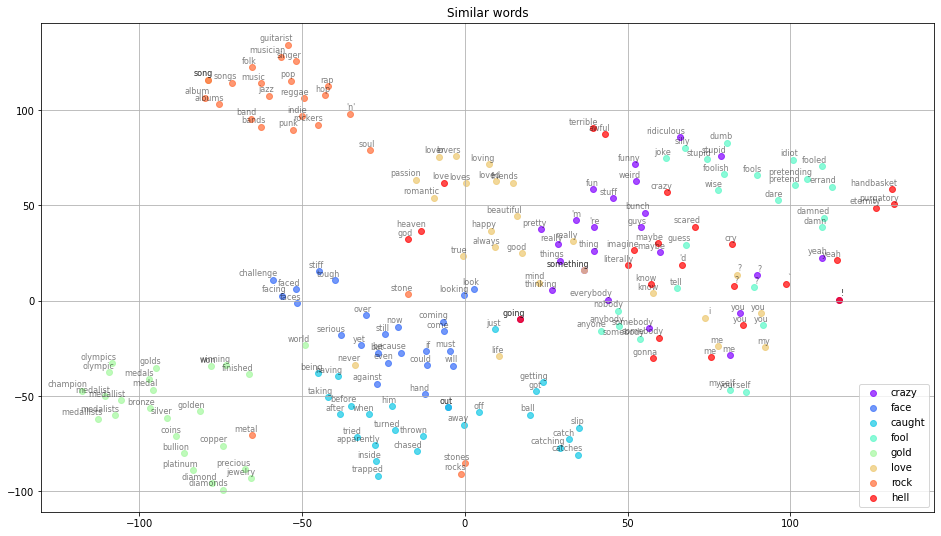

In [33]:
# Plotting the cluster of similar words
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')